In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from helper_utils import load_from_pickle, quick_enrichment_tst, chi2ovr_cnt, left_intersect, peakset2df, mtfcmp_indbrcavctrl_v2, viz_mtfcmp

In [3]:
cleaned_motif_file = 'ismshap_indbrcaVctrl_vierstrav1.pkl' ### TODO: path to BRCA cleaned motifs
peakset_file = 'diffpks_indbrcavctfl_cnvcrctv5_gt100_union_promoternorm.pkl' ### TODO: peakset file

assert os.path.exists(cleaned_motif_file), "Requires: Cleaned motifs pickle file: ismshap_indbrcaVctrl_vierstrav1.pkl"
assert os.path.exists(peakset_file), "Requires: peakset file: diffpks_indbrcavctfl_cnvcrctv5_gt100_union_promoternorm.pkl"


In [ ]:
df = mtfcmp_indbrcavctrl_v2(
        cleaned_motif_file = cleaned_motif_file,
        peakset_file=peakset_file)

In [5]:
name_key = 'group_name'
suffix = 'clstrmap_v6_orignames_nobasal5'
zscore_type = 'rowcol'
n = 'sig_only_top10ORgt1'
drop_motif = None

subsets = {'up': df.loc[[True if '_canc_cancup' in s else False for s in df['sample']]],}
subsets['up'] = subsets['up'].loc[[True if 'BASAL5' not in s else False for s in subsets['up']['sample']]]
subset = "up"
col_cluster = False
viz_OR = True
cmap = 'hot_r'

figsize = (5, 12)

In [6]:
export = False
dfplt, p = viz_mtfcmp(
                    subsets[subset], 
                    name_key=name_key, 
                    names2display=None,
                    topn=n,
                    fillna=True,
                    viz_OR=viz_OR,
                    drop=drop_motif,
                    cmap=cmap,
                    zscore=zscore_type,
                    save_plot=None if not export else os.path.join('./', '{}_{}_z{}_top{}_drop{}.pdf'.format(suffix, subset, zscore_type, n, drop_motif)),
                    save_mat=None if not export else './{}_{}_z{}_top{}_drop{}.csv'.format(suffix, subset, zscore_type, n, drop_motif),
                    return_plot_obj=True,
                    col_cluster=col_cluster,
                    figsize_wh=figsize,
                )

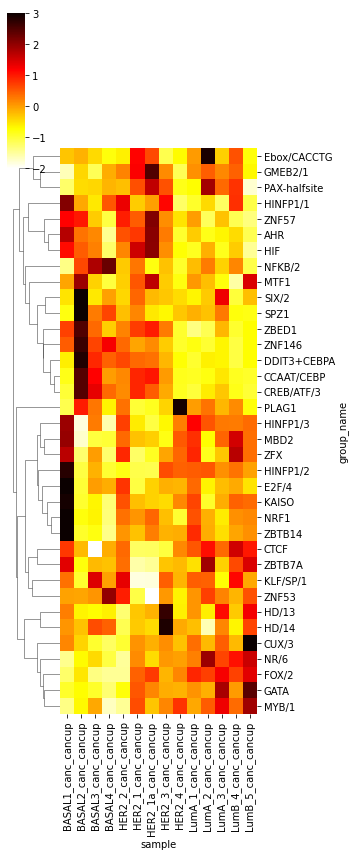

In [7]:
dt = dfplt['df_plot'][['BASAL1_canc_cancup', 'BASAL2_canc_cancup', 'BASAL3_canc_cancup',
       'BASAL4_canc_cancup', 'HER2_2_canc_cancup', 'HER2_1_canc_cancup', 'HER2_1a_canc_cancup', 'HER2_3_canc_cancup', 'HER2_4_canc_cancup',
       'LumA_1_canc_cancup', 'LumA_2_canc_cancup', 'LumA_3_canc_cancup',
       'LumB_4_canc_cancup', 'LumB_5_canc_cancup']]
p = sns.clustermap(dt, xticklabels=True, yticklabels=True, cmap=cmap, 
                   row_cluster=True, col_cluster=False, z_score=None, figsize=(5, 12), vmax=3, vmin=-2.)
plt.show()

In [8]:
subset="do"
name_key = 'group_name'
suffix = 'clstrmap_v5_orignames_nobasal5'
zscore_type = 'rowcol'
n = 'sig_only_top10OR'
drop_motif = None
subsets = {'do': df.loc[[True if '_ctrl_cancdo' in s else False for s in df['sample']]]}
subsets['do'] = subsets['do'].loc[[True if 'BASAL5' not in s else False for s in subsets['do']['sample']]]
col_cluster = False
viz_OR = True
cmap = 'hot_r'

figsize = (5, 12)



In [9]:
export = False
dfplt, p = viz_mtfcmp(
                    subsets[subset], 
                    name_key=name_key, 
                    names2display=None,
                    topn=n,
                    fillna=True,
                    viz_OR=viz_OR,
                    drop=drop_motif,
                    cmap=cmap,
                    zscore=zscore_type,
                    save_plot=None if not export else os.path.join('./', '{}_{}_z{}_top{}_drop{}.pdf'.format(suffix, subset, zscore_type, n, drop_motif)),
                    save_mat=None if not export else './{}_{}_z{}_top{}_drop{}.csv'.format(suffix, subset, zscore_type, n, drop_motif),
                    return_plot_obj=True,
                    col_cluster=col_cluster,
                    figsize_wh=figsize,
                )

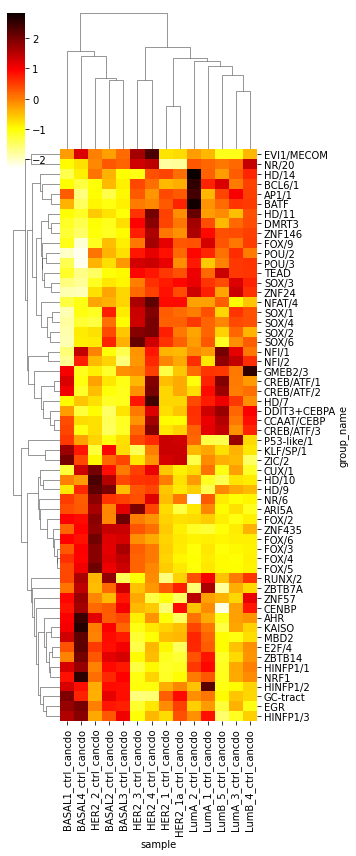

In [10]:
dt = dfplt['df_plot'][['BASAL1_ctrl_cancdo', 'BASAL2_ctrl_cancdo', 'BASAL3_ctrl_cancdo',
       'BASAL4_ctrl_cancdo', 'HER2_2_ctrl_cancdo', 'HER2_1_ctrl_cancdo', 'HER2_1a_ctrl_cancdo', 'HER2_3_ctrl_cancdo', 'HER2_4_ctrl_cancdo',
       'LumA_1_ctrl_cancdo', 'LumA_2_ctrl_cancdo', 'LumA_3_ctrl_cancdo',
       'LumB_4_ctrl_cancdo', 'LumB_5_ctrl_cancdo']]
p = sns.clustermap(dt, xticklabels=True, yticklabels=True, cmap=cmap, 
                   row_cluster=True, col_cluster=True, z_score=None, figsize=(5, 12), )#vmax=3., vmin=-3.)
